# Importacion de recursos

In [13]:
import os
import sys
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from Services.Load import Read
from Config.Instancia import NameDataset

### Planteamiento de segunda Hipótesis para la Comparación de Clasificación Existente con Resultados de Clustering

Dado que el conjunto de datos incluye variables que miden la alimentación y cantidad de ejercicio podemos realizar una prueba de hipótesis para evaluar si existen distintos grupos de personas según caracteristicas como (consumo de agua y cantidad de comidas principales al día) con los resultados de un modelo de clasificación no supervisada (clustering). Esto permitirá verificar si existen patrones en los datos que respalden la agrupación de personas segun sus habitos de alimentación y de ejericio.os.

#### Hipótesis

**Hipótesis Nula (H₀):**  
Los clusters generados mediante un modelo de clasificación no supervisada (por ejemplo, K-means o clustering jerárquico) no presentgrupos de personas según sus habitos de alimentación y de ejericiotos.

**Hipótesis Alternativa (H₁):**  
Los clusters generados mediante un modelo de clasificación no supervisada presen grupos de personas según sus habitos de alimentación y de ejericionte.

#### Metodología de Evaluac

1. **Aplicación de reducción adimencional:** Aplicar el algoritmo de analisis de componentes principales utilizando variables numéricas del conjunto de datos, para poder extraer las variables que contienen más información y por lo tanto relevancia en la explicación de la variabilidad de la data.ió2

1. **Generación de Clusters:** Aplicar un algoritmo de clustering no supervisado (como K-means) utilizando las variables numéri que se identificaron como relevantescas del conjunto de datos, para identificar grupos naturales de individuos según sus características.

2. **Comparación de Resultados:** Comparars distribución de las variables que caracterizan los habitos alimenticios y de ejericio por cada clusternte. Esto se puede evaluar mediangraficas box plot y así analizar si existe una diferencia sugnificativa entre clusters teniendo en cuenta habitos alimenticios y de ejericiodos.

3. **Interpretación:** Si encontramos una relación significativa, se puede concluir que los clusters reflejan, en alguna medidla agrupación de eprsonas por sus habitos alimenticios y de ejericiotos. Si no se encuentra una relación significativa, esto sugeriría que los clusters muestran nuevos patronsin relación a la alimentación o al ejericional.

#### Objetivo del Análisis

El propósito análisis es usar clustering para ver si se pueden identificar "perfiles" de alimentación y ejerciciotos. Esto puede ser útil para validar o complementar los modelos de clasificación y para comprender mejor las diferencias dentro de los grupos en funcia sus habitosnto.

In [119]:
df = Read(NameDataset.Obesidad)

In [121]:
# Importar librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = df.read_df()  # Asegúrate de que df ahora contiene el DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [123]:
# Convertir en entero
df['Age']=df['Age'].astype('int')
df['FCVC']=df['FCVC'].astype('int')
df['NCP']=df['NCP'].astype('int')
df['CH2O']=df['CH2O'].astype('int')
df['FAF']=df['FAF'].astype('int')
df['TUE']=df['TUE'].astype('int')

In [23]:
# Comprobar cambio de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   int32  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int32  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [59]:
# variable objetivo
target = df['NObeyesdad']

# Inicializamos el codificador y lo ajustamos a los datos
label_encoder = LabelEncoder()
target_numerico = label_encoder.fit_transform(target)

# Filtrar solo las variables numéricas
numerical_data = df.select_dtypes(include=['float64', 'int32'])

# Quitar variables Height y Weight
numerical_data = numerical_data.drop('Height', axis=1)
numerical_data = numerical_data.drop('Weight', axis=1)

# Comprobar variables en el dataset a analizar
print(numerical_data.columns)

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


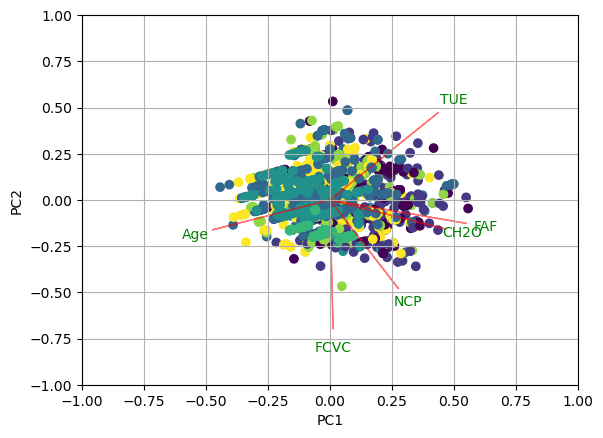

In [63]:
# Escalar los datos
scaler = StandardScaler()
numerical_data_scaled=scaler.fit_transform(numerical_data)

# Grafica analisis de componentes principales
pca = PCA()
numerical_data_scaled_pca = pca.fit_transform(numerical_data_scaled)
columnasobe=["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = target_numerico)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, columnasobe[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
biplot(numerical_data_scaled_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [65]:
# ratios
pca.explained_variance_ratio_

array([0.25626148, 0.20095125, 0.16179454, 0.14282852, 0.12243882,
       0.11572539])

#### Conclusiones aplicación reducción dimencional

Como se puede observar no es suficiente tomar los dos primeros componentes principales ya que no se ve una clara división de la información. igualmente esta conclusión se comprueba al revisar los ratios ya que estos componentes solo explican alrededor del 44% de la variabilidad de la información por lo que se define acorde a los ratios tomar los primeros 4 componentes principales que determinan alrededor del 75% de la variabilidad de los datos.

Por otra parte, se observa que para el componente 2 se destaca la variabilidad de la variable `FCVC` y para el componente 1 las variables `CH2O` y `FAF`.

### Generación de Clusters con reentrenmiento del modelo realizado con kmeans

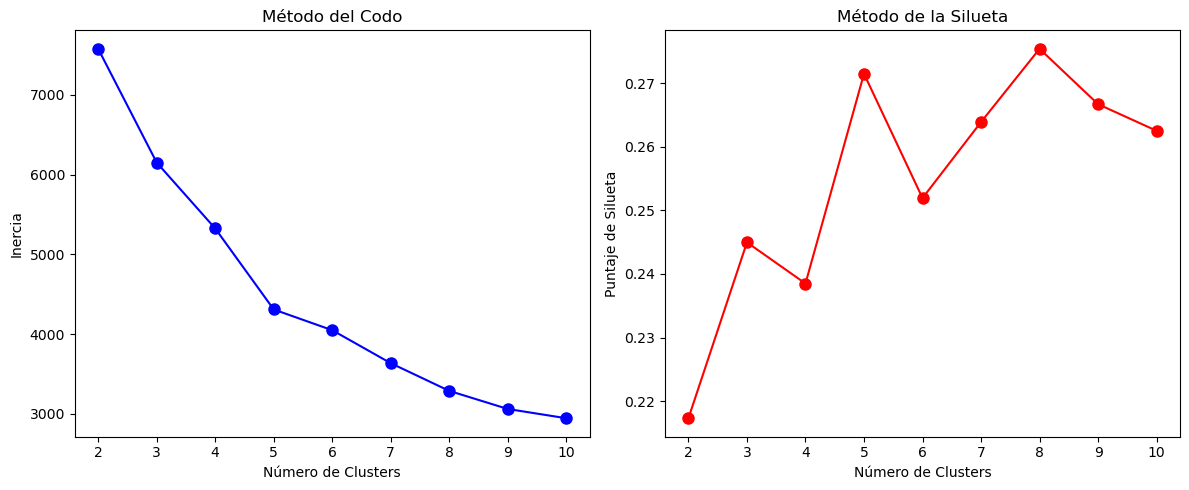

In [76]:
# Aplicar modelo PCA con los 4 primeros componentes
pca = PCA(n_components=4)
df_pca = pca.fit_transform(numerical_data_scaled)
# Definir la función para los métodos de codo y silueta
def metodo_codo_silueta(data, max_clusters=10):
    inercia = []
    silueta_scores = []

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)

        # Calcular inercia y puntaje de silueta
        inercia.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        silueta_scores.append(silhouette_avg)

    # Gráfica del método del codo
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), inercia, 'bo-', markersize=8)
    plt.xlabel("Número de Clusters")
    plt.ylabel("Inercia")
    plt.title("Método del Codo")

    # Gráfica del método de la silueta
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silueta_scores, 'ro-', markersize=8)
    plt.xlabel("Número de Clusters")
    plt.ylabel("Puntaje de Silueta")
    plt.title("Método de la Silueta")

    plt.tight_layout()
    plt.show()

    return inercia, silueta_scores

# Ejecutar los métodos en los datos escalados
inercia, silueta_scores = metodo_codo_silueta(df_pca)

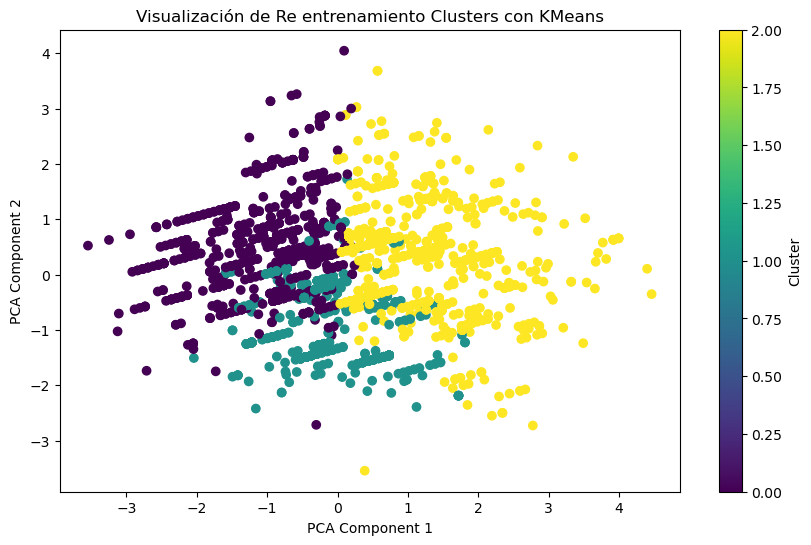

In [125]:
# Entrenar el modelo con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_pca)

# Asignar clusters a la data
df['Cluster'] = kmeans.labels_

# Crear el gráfico de dispersión con colores según los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualización de Re entrenamiento Clusters con KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [101]:
# Comprobar Columna Cluster
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,2
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,2
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,2
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,1
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,0
5,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight,0
6,Female,23,1.50,55.0,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight,1
7,Male,22,1.64,53.0,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight,2
8,Male,24,1.78,64.0,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight,1
9,Male,22,1.72,68.0,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight,2


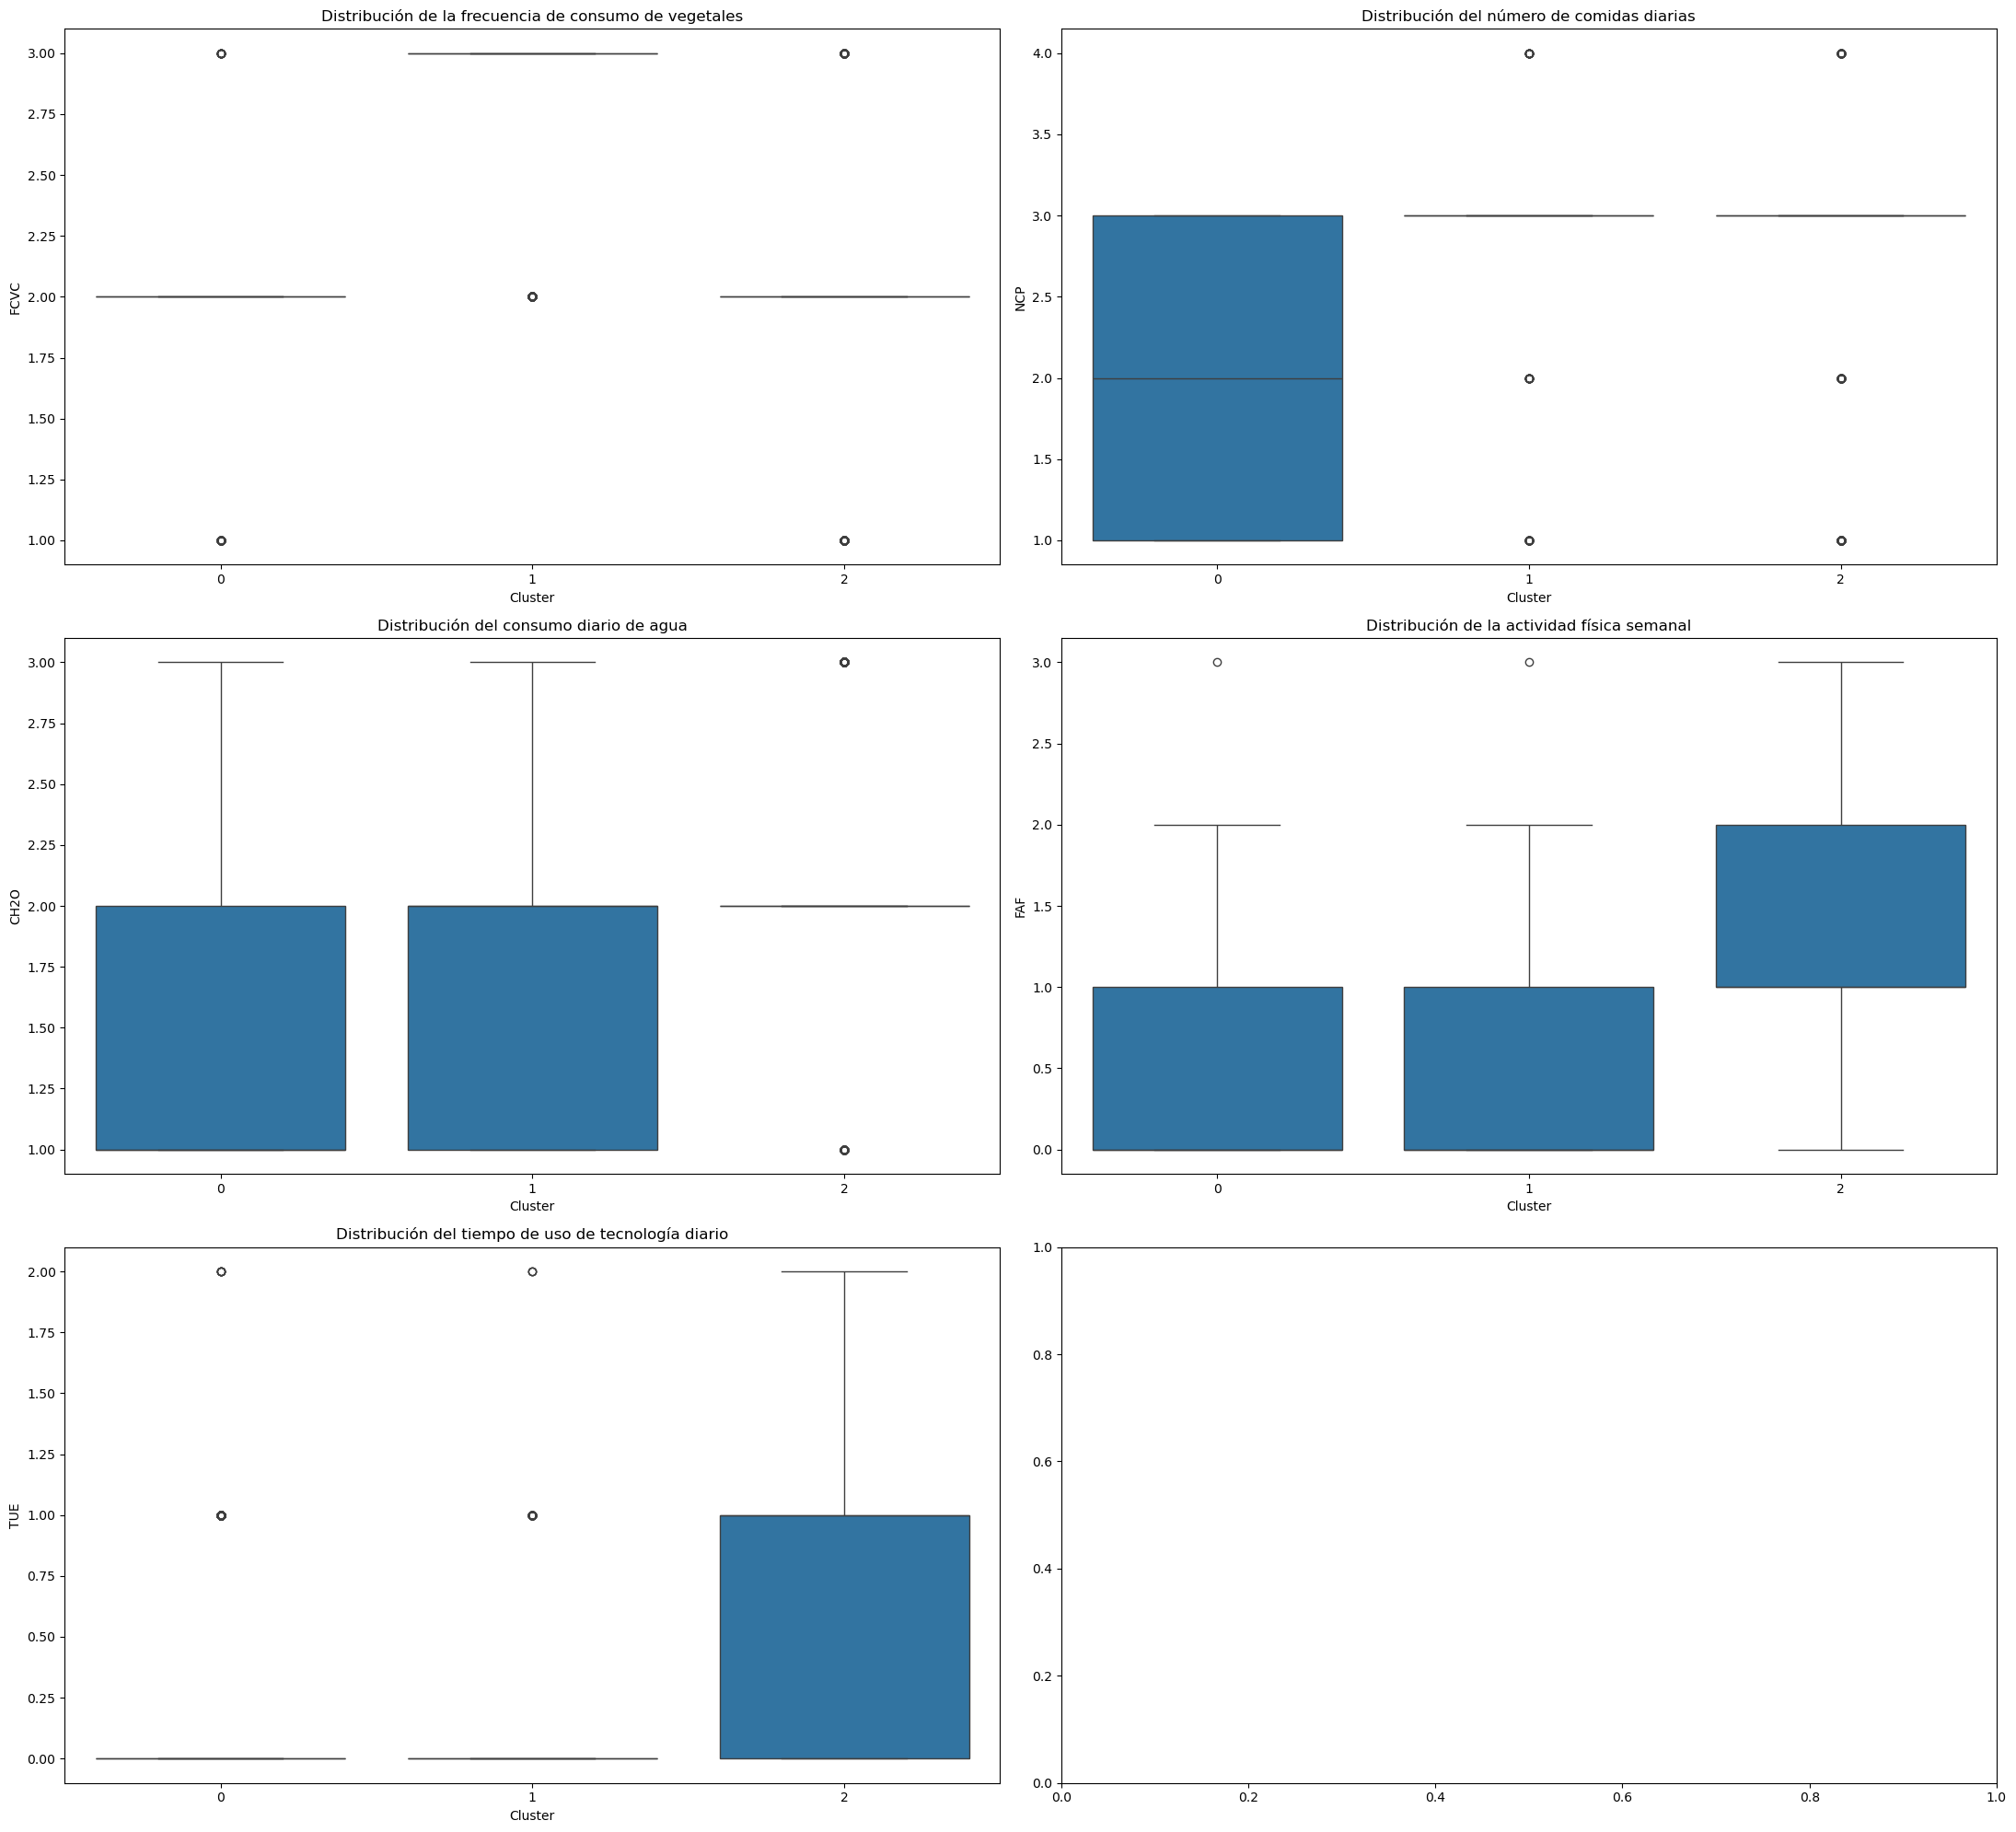

In [147]:
# crear una cuadrícula de 2x2 para los boxplots
fig ,  axes  =  plt . subplots ( 3 ,  2 ,  figsize = ( 22 ,  20 ))

# graficar cada boxplot en su respectiva subgráfica
sns . boxplot( x = 'Cluster' ,  y = 'FCVC' ,  data = df ,  ax = axes [ 0 ,  0 ])
axes [ 0 ,  0 ] . set_title ( 'Distribución de la frecuencia de consumo de vegetales' )

sns . boxplot( x = 'Cluster' ,  y = 'NCP' ,  data = df ,  ax = axes [ 0 ,  1 ])
axes[ 0 ,  1 ] . set_title ( 'Distribución del número de comidas diarias' )

sns . boxplot( x = 'Cluster' ,  y = 'CH2O' ,  data = df ,  ax = axes [ 1 ,  0 ])
axes [ 1 ,  0 ] . set_title ( 'Distribución del consumo diario de agua' )

sns . boxplot( x = 'Cluster' ,  y = 'FAF' ,  data = df ,  ax = axes [ 1 ,  1 ])
axes [ 1 ,  1 ] . set_title ( 'Distribución de la actividad física semanal' )

sns . boxplot( x = 'Cluster' ,  y = 'TUE' ,  data = df ,  ax = axes [ 2 ,  0 ])
axes [ 2 ,  0 ] . set_title ( 'Distribución del tiempo de uso de tecnología diario' )

# ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

In [143]:
def graficar_matriz_confusion(df):
        """
        Genera la gráfica de la matriz de confusión entre los clusters y la clasificación de obesidad original.
        """
        if df is not None and 'Cluster' in df.columns:
            # Convertir la variable de obesidad a etiquetas numéricas
            le = LabelEncoder()
            df['ObesityClass'] = le.fit_transform(df['NObeyesdad'])
            
            # Calcular la matriz de confusión
            conf_matrix = confusion_matrix(df['ObesityClass'], df['Cluster'])

            # Graficar la matriz de confusión
            plt.figure(figsize=(10, 7))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                        xticklabels=[f"Cluster {i}" for i in range(3)],
                        yticklabels=le.classes_)
            plt.xlabel("Clusters Predichos")
            plt.ylabel("Clasificación de Obesidad Original")
            plt.title("Matriz de Confusión entre Clusters y Clasificación de Obesidad")
            plt.show()
        else:
            print("Asegúrate de haber aplicado el modelo K-means y de que el DataFrame esté cargado.")

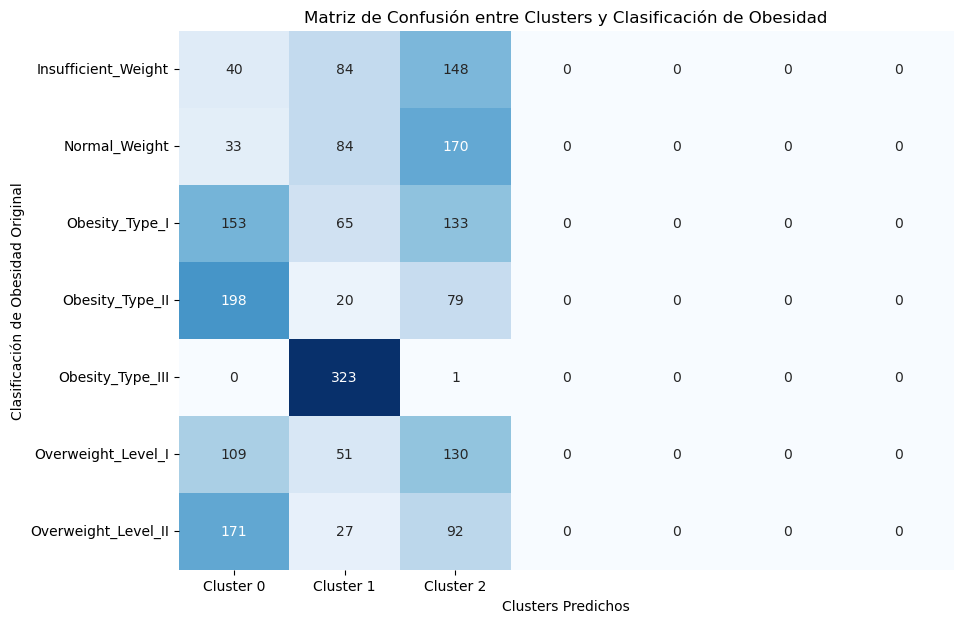

In [145]:
# Graficar matriz confusion
graficar_matriz_confusion(df)

### Conclusiones finales

Como se pudo observar al reentrenar el modelo y definir el agrupamienro de los datos en 3 clusters, se logra una mejor definición de los grupos realizados al igual que una mejor relación con la variable objetivo.

De hecho podemos ver que una de las caracteristicas del cluster 3 son personas que si realizan ejericio durante la semana y visualizando la matriz de confusión podemos ver que se identificaron 170 personas con peso normal, lo que relaciona un peso saludable con la realización de actividad fisica. 

### Aceptación o Negación de la Hipótesis

#### Hipótesis Planteada

- **Hipótesis Nula (H₀):** Los clusters generados mediante un modelo de clasificación no supervisada (por ejemplo, K-means o clustering jerárquico) no presentan grupos de personas según sus habitos de alimentación y de ejericio.

- **Hipótesis Alternativa (H₁):** Los clusters generados mediante un modelo de clasificación no supervisada presentan grupos de personas según sus habitos de alimentación y de ejericio.

#### Evaluación de los Resultados

1. **Diagrama de cajas y bigotes**:
   - Las variables frecuencia de consumo de vegetales, número de comidas diarias y tiempo de uso de tecnología diario muestran una estrecha relación con los patrones evidenciados. Ej: en el cluster 2 muestra que esta conformado por las personas que no consumen vegetales.


#### Conclusión: Aceptación o Negación de la Hipótesis

- **Negación de la Hipótesis Nula (H₀):** Los resultados sugieren que **existe una relación significativa** entre los clusters generados y los habitos de alimentación y ejercio de las personas.n este conjunto de datos.